In [43]:
import pandas as pd

In [44]:
data = pd.read_csv('loan_approval_dataset.csv')

In [45]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [46]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [48]:
data.columns = data.columns.str.strip()

In [49]:
categorical = ['education', 'self_employed', 'loan_status']

In [50]:
encoded = pd.get_dummies(data, columns=categorical, drop_first=True)

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
numeric = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 
                     'residential_assets_value', 'commercial_assets_value', 
                     'luxury_assets_value', 'bank_asset_value']

In [53]:
scaler = StandardScaler()

In [54]:
encoded[numeric] = scaler.fit_transform(encoded[numeric])

In [55]:
encoded.columns

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'education_ Not Graduate', 'self_employed_ Yes',
       'loan_status_ Rejected'],
      dtype='object')

In [56]:
x = encoded.drop(columns=['loan_status_ Rejected', 'loan_id'])
y = encoded['loan_status_ Rejected']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [62]:
y_pred = logreg.predict(x_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred)

In [64]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [65]:
print('Accuracy:',accuracy)
print('Confusion Matrix: \n',conf_matrix)

Accuracy: 0.9039812646370023
Confusion Matrix: 
 [[747  63]
 [ 60 411]]


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

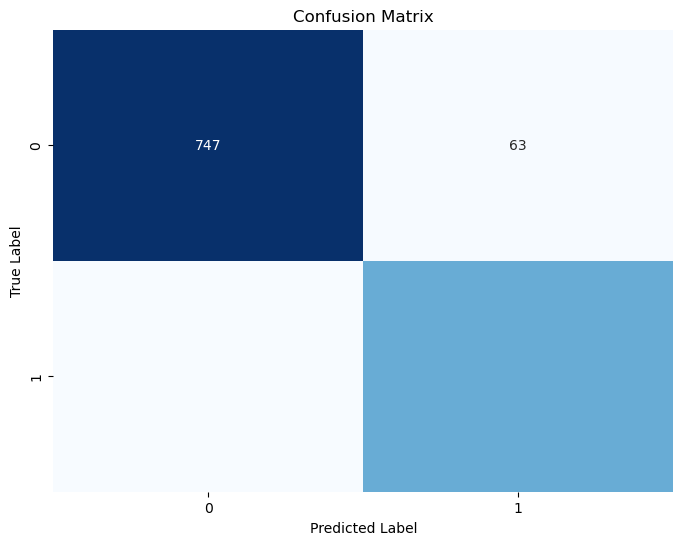

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()